In [30]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')



data = load_breast_cancer() #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=.9)


#Using GridSearchCV
model = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', cv=5)
model.fit(X_train, y_train)



print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.9936868686868687


In [32]:
model.cv_results_

{'mean_fit_time': array([0.00213566, 0.00323849, 0.00512896, 0.00710135, 0.00813289]),
 'std_fit_time': array([0.00031471, 0.00022252, 0.00025329, 0.00061585, 0.00181998]),
 'mean_score_time': array([0.01070375, 0.00102372, 0.00107555, 0.00100188, 0.00100579]),
 'std_score_time': array([1.92475611e-02, 3.82782941e-05, 8.58703363e-05, 1.23724312e-05,
        1.50476692e-05]),
 'param_C': masked_array(data=[0.0001, 0.01, 1, 100, 10000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001}, {'C': 0.01}, {'C': 1}, {'C': 100}, {'C': 10000}],
 'split0_test_score': array([0.97894737, 0.98259109, 0.98259109, 0.98987854, 0.99271255]),
 'split1_test_score': array([0.99190283, 0.9951417 , 0.99959514, 0.99838057, 0.99797571]),
 'split2_test_score': array([0.94696356, 0.97287449, 0.98623482, 0.97206478, 0.97368421]),
 'split3_test_score': array([0.92806653, 0.96548857, 0.98336798, 0.97962578, 0.97962578]),
 'split4_tes

In [33]:
params = tuned_parameters[0]['C']
test_scores = model.cv_results_['mean_test_score']
train_scores = model.cv_results_['mean_train_score']

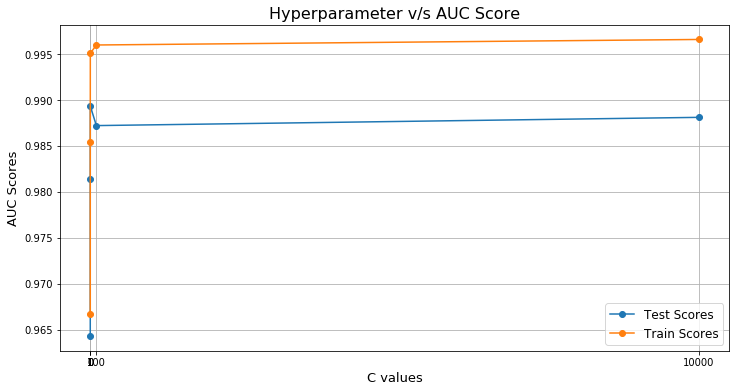

In [35]:
plt.figure(figsize=(12,6))
plt.plot(params, test_scores, '-o', label='Test Scores')
plt.plot(params, train_scores, '-o', label='Train Scores')
plt.xticks(params)
plt.xlabel('C values', fontsize=13)
plt.ylabel('AUC Scores', fontsize=13)
plt.title('Hyperparameter v/s AUC Score', fontsize=16)
plt.grid('on')

plt.legend(loc='best', fontsize=12)
plt.show()

In [36]:
model.best_estimator_.coef_

array([[ 1.73139121,  0.08268027, -0.0516868 ,  0.00256713, -0.1263932 ,
        -0.29994283, -0.53908729, -0.26710596, -0.18225064, -0.01688041,
         0.050223  ,  1.25393833,  0.49383121, -0.1282114 , -0.01361649,
         0.02096006, -0.04470373, -0.03227352, -0.01690861,  0.00782121,
         1.54770075, -0.31862834, -0.13822649, -0.02755142, -0.23585585,
        -0.94303847, -1.38769738, -0.538084  , -0.48906989, -0.09046976]])

In [2]:
model.best_estimator_.classes_

array([0, 1])

In [12]:
# More Sparsity (Fewer elements of W* being non-zero) by increasing Lambda (decreasing C) 

import numpy as np

clf = LogisticRegression(C=0.1, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))
sparsity = ((w==0).sum()/w.shape[1]) * 100
print(sparsity)


7
76.66666666666667


In [17]:
clf = LogisticRegression(C=0.01, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))
print((w==0).sum())

5
25


In [25]:
clf = LogisticRegression(C=0.001, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))
print((w==0).sum())

3
27


In [23]:
clf = LogisticRegression(C=10, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))
print((w==0).sum())

16
14
